# Introduction

The **astropy.io.fits** package provides access to FITS files. FITS (Flexible Image Transport System) is a portable file standard widely used in the astronomy community to store images and tables. This subpackage was originally developed as PyFITS.


In [10]:


import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

plt.rcParams['figure.figsize'] = (18.8, 6.6)


Download the example FITS files (which contain the image data for the Horsehead Nebula) for this tutorial.

In [2]:


from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )





To use your own data in the future, use **astropy.io.fits.open()**

# Opening FITS files and loading the image data


Let's open the FITS file to find out what it contains.


In [3]:


hdu_list = fits.open(image_file)
hdu_list.info()



Filename: /home/arun/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   




Generally, the image information is located in the PRIMARY block. The blocks are numbered and can be accessed by indexing hdu_list.


In [4]:
image_data = hdu_list[0].data



Our data is now stored as a 2D numpy array. But how do we know the dimensions of the image? We can look at the shape of the array.



In [5]:


print(type(image_data))
print(image_data.shape)



<class 'numpy.ndarray'>
(893, 891)




Great! At this point, we can close the FITS file because we've stored everything we wanted to a variable. By closing the FITS file, we can make sure that it won't continue using up excess memory or file handles on the computer.


In [6]:
hdu_list.close()


SHORTCUT

If you don't need to examine the FITS header, you can call fits.getdata to bypass the previous steps.


In [7]:
image_data = fits.getdata(image_file)

# Viewing the image data

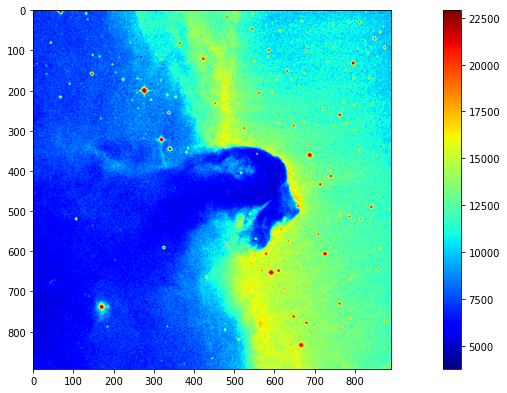

In [11]:


plt.imshow(image_data, cmap='jet')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps



# Displaying the image with a logarithmic scale

What if we want to use a logarithmic color scale? To do so, we'll need to load the LogNorm object from matplotlib.


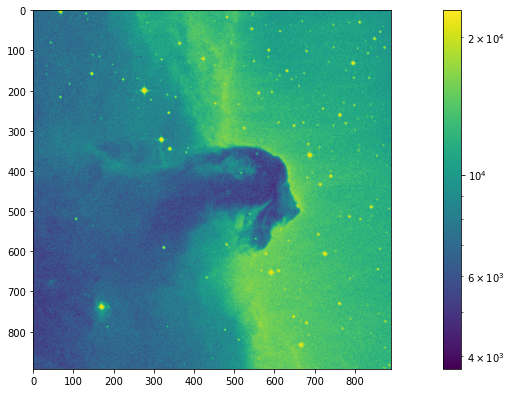

In [12]:
from matplotlib.colors import LogNorm

plt.imshow(image_data, cmap='viridis', norm=LogNorm())


cbar = plt.colorbar()
#cbar.ax.set_yticklabels(['5,000','10,000','20,000'])